In [5]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np
from keras.preprocessing import image

import matplotlib.pyplot as plt

In [6]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, 
                             input_shape = (64, 64, 3), 
                             activation = 'relu'))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(output_dim = 128, 
                     activation = 'relu'))
classifier.add(Dense(output_dim = 10, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  import sys
C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


In [7]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/Dataset10/train_set10',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/Dataset10/test_set10',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'categorical')

Found 3590 images belonging to 10 classes.
Found 1482 images belonging to 10 classes.


In [8]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 500,
        epochs = 10,
        validation_data = test_set,
        validation_steps = 50)

Epoch 1/10
500/500 [==============================] - 674s 1s/step - loss: 0.7557 - acc: 0.7699 - val_loss: 0.2345 - val_acc: 0.9474
Epoch 2/10
500/500 [==============================] - 658s 1s/step - loss: 0.1071 - acc: 0.9776 - val_loss: 0.1186 - val_acc: 0.9747
Epoch 3/10
500/500 [==============================] - 654s 1s/step - loss: 0.0363 - acc: 0.9944 - val_loss: 0.0818 - val_acc: 0.9886
Epoch 4/10
500/500 [==============================] - 655s 1s/step - loss: 0.0130 - acc: 0.9989 - val_loss: 0.0556 - val_acc: 0.9943
Epoch 5/10
500/500 [==============================] - 655s 1s/step - loss: 0.0146 - acc: 0.9973 - val_loss: 0.0767 - val_acc: 0.9892
Epoch 6/10
500/500 [==============================] - 656s 1s/step - loss: 0.0031 - acc: 0.9997 - val_loss: 0.0651 - val_acc: 0.9899
Epoch 7/10
500/500 [==============================] - 658s 1s/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.0783 - val_acc: 0.9892
Epoch 8/10
500/500 [==============================] - 657s 1s/step - 

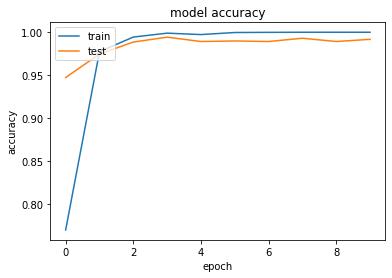

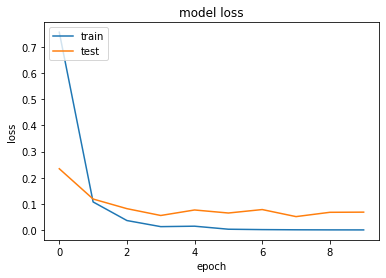

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
# save model and architecture to single file
classifier.save("model.h10")
print("Saved model to disk")

Saved model to disk


In [5]:
# load and evaluate a saved model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from numpy import loadtxt
from keras.models import load_model
from keras.preprocessing import image

from IPython.display import display
from PIL import Image

import numpy as np

# load model
classifier = load_model('model.h10')

In [102]:
test_image = load_img('C:/Users/ASUS/Desktop/Research/Image Dataset/10/1/letter10.3._0_4833.jpg', target_size = (64, 64))

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict_classes(test_image)

print(result)

#training_set.class_indices

[1]


In [103]:
if result == 0:
    prediction = 'Sign 1'
elif result == 1:
    prediction = 'Sign 10'
elif result == 2:
    prediction = 'Sign 2'
elif result == 3:
    prediction = 'Sign 3'
elif result == 4:
    prediction = 'Sign 4'
elif result == 5:
     prediction = 'Sign 5'
elif result == 6:
     prediction = 'Sign 6'
elif result == 7:
     prediction = 'Sign 7'
elif result == 8:
     prediction = 'Sign 8'
elif result == 9:
     prediction = 'Sign 9'

print(prediction)

Sign 10
